In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
base_folder = 'c:\\Users\\jrshs\\OneDrive\\Desktop\\OA3801\\Final Project\\Data' 
sub_folder_pre = 'pre2008engines.csv' 
sub_folder_post = 'engines.csv'
pre_path = os.path.join(base_folder,sub_folder_pre)
post_path = os.path.join(base_folder,sub_folder_post)
df_pre = pd.read_csv(pre_path)
df_post = pd.read_csv(post_path)

display(len(df_pre))
display(len(df_post))

62727

26807

In [2]:
df_engines = pd.concat([df_pre, df_post])
display(df_engines.head())
#df_engines.loc[df_engines['ev_id']=='20080107X00026']
num_aircraft = len(df_engines)
num_ids = df_engines['ev_id'].nunique()
print(f'There are {num_ids} events in df_engines and {num_aircraft} aircraft involved')

,ev_id,Aircraft_Key,eng_no,eng_type,eng_mfgr,eng_model,power_units,hp_or_lbs,lchg_userid,lchg_date,carb_fuel_injection,propeller_type,propeller_make,propeller_model,eng_time_total,eng_time_last_insp,eng_time_overhaul
0,20001213X25852,1,1,REC,CONTINENTAL,C-85-12-F,85.0,HP,NaN,09/20/21 13:49:08,CARB,NaN,NaN,NaN,0,0,0
1,20001211X15972,1,1,REC,CONTINENTAL,IO-520-F13B,300.0,HP,NaN,09/20/21 15:26:21,FINJ,NaN,NaN,NaN,0,0,0
2,20001211X15973,1,1,REC,CONTINENTAL,TSIO-520-VB,325.0,HP,NaN,12/15/21 19:14:26,FINJ,NaN,NaN,NaN,0,0,0
3,20001211X11897,1,1,REC,LYCOMING,O-320-B2B,160.0,HP,NaN,09/20/21 15:26:22,CARB,NaN,NaN,NaN,0,0,0
4,20001211X12053,1,1,REC,CONTINENTAL,IO-520-F,300.0,HP,NaN,09/20/21 16:33:05,FINJ,NaN,NaN,NaN,0,0,0


There are 84135 events in df_engines and 89534 aircraft involved


In [3]:
date_pre = 'pre2008events.csv' 
date_post = 'events.csv'
date_pre_path = os.path.join(base_folder,date_pre)
date_post_path = os.path.join(base_folder,date_post)
df_date_pre = pd.read_csv(date_pre_path,usecols=['ev_id','ev_date','ev_year'])
df_date_post = pd.read_csv(date_post_path,usecols=['ev_id','ev_date','ev_year'])
df_date = pd.concat([df_date_pre, df_date_post])
display(len(df_date))

C:\Users\jrshs\AppData\Local\Temp\ipykernel_36696\53366764.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_date_post = pd.read_csv(date_post_path,usecols=['ev_id','ev_date','ev_year'])


92228

In [4]:
import datetime
df_date_engines = pd.merge(df_date, df_engines, on='ev_id', how='left')
display(len(df_date_engines))


null = df_date_engines.loc[df_date_engines['Aircraft_Key'].isnull()].index
#null
#df_date_engines[df_date_engines['Aircraft_Key'].isnull()]
df_engine_master = df_date_engines.drop(index=null)
unk = df_engine_master.loc[df_engine_master['eng_type']=='UNK'].index
df_engine_master = df_engine_master.drop(index=unk)
mfg = df_engine_master.loc[df_engine_master['eng_mfgr'].isnull()].index
df_engine_master = df_engine_master.drop(index=mfg)


times = pd.to_datetime(df_engine_master['ev_date'].values)
df_engine_master.ev_date = times
df_engine_master = df_engine_master.sort_values('ev_date')
display(df_engine_master.head())
display(len(df_engine_master))
#df_engine_master.to_csv('engines_master.csv')
#df_engine_master.loc[df_engine_master['ev_id']=='20080107X00026']

97255

C:\Users\jrshs\AppData\Local\Temp\ipykernel_36696\2847579248.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  times = pd.to_datetime(df_engine_master['ev_date'].values)


,ev_id,ev_date,ev_year,Aircraft_Key,eng_no,eng_type,eng_mfgr,eng_model,power_units,hp_or_lbs,lchg_userid,lchg_date,carb_fuel_injection,propeller_type,propeller_make,propeller_model,eng_time_total,eng_time_last_insp,eng_time_overhaul
27209,20001218X45448,1977-06-19,1977,1.0,1.0,REC,Lycoming,IO-360-C1D6,200.0,HP,NaN,09/20/21 13:30:39,FINJ,NaN,NaN,NaN,0.0,0.0,0.0
64963,20170710X52551,1979-09-17,1979,1.0,1.0,TF,Pratt & Whitney,JT8D-7,NaN,NaN,broda,09/25/20 13:53:04,NaN,NaN,NaN,NaN,16950.0,0.0,2359.0
64964,20170710X52551,1979-09-17,1979,1.0,2.0,TF,Pratt & Whitney,JT8D-7,NaN,NaN,broda,09/25/20 13:53:04,NaN,NaN,NaN,NaN,22087.0,0.0,3629.0
9647,20001218X45446,1981-08-01,1981,1.0,1.0,REC,CONTINENTAL,O-470-K,230.0,HP,NaN,09/22/21 16:57:27,CARB,NaN,NaN,NaN,0.0,0.0,0.0
61359,20020909X01559,1982-01-01,1982,1.0,1.0,REC,LYCOMING,O-320-D3G,160.0,HP,NaN,09/02/21 18:10:22,CARB,NaN,NaN,NaN,0.0,0.0,0.0


84869

In [5]:
df_engine_master['eng_mfgr'] = (
    df_engine_master['eng_mfgr']
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
    .str.upper()
)

alias_map = {
    "lycoming": "Lycoming",
    "avco lycoming": "Lycoming",
    "textron lyc.": "Lycoming",
    "continental": "Continental",
    "cont motor": "Continental",
    "teledyne continental": "Continental",
    "pratt & whitney": "Pratt & Whitney",
    "pratt and whitney": "Pratt & Whitney",
    "p&w": "Pratt & Whitney",
    "p&w canada": "Pratt & Whitney Canada",
    "rolls-royc": "Rolls-Royce",
    "rolls royce": "Rolls-Royce",
    "ge": "General Electric",
    "general electric": "General Electric"
}
df_engine_master["eng_mfgr"] = df_engine_master["eng_mfgr"].replace(alias_map)

eng_mfgrs = df_engine_master['eng_mfgr'].value_counts()
for mfgr in eng_mfgrs.index:
    print(f'{mfgr}: {eng_mfgrs[mfgr]}')

df_mfg_year = df_engine_master.pivot_table(index='ev_year', columns='eng_mfgr', aggfunc='size', fill_value=0).astype(int)
#df_mfg_year.tail()
c_sum = df_mfg_year.cumsum(axis=0).iloc[-1]
c_sort = c_sum.sort_values(ascending=False)
df_mfg_sorted = df_mfg_year[c_sort.index]
df_mfg_sorted.head()
df_mfg_top = df_mfg_sorted.iloc[:,0:10]
df_mfg_top.head()

LYCOMING: 35902
CONTINENTAL: 21524
P&W: 4251
ROTAX: 2615
CONT MOTOR: 2611
ALLISON: 2014
PRATT & WHITNEY: 1659
FRANKLIN: 807
GARRETT: 791
ROLLS-ROYCE: 698
TELEDYNE CONTINENTAL: 660
GE: 624
PRATT & WHITNEY CANADA: 564
GENERAL ELECTRIC: 533
TURBOMECA: 514
CONTINENTAL MOTORS: 467
P&W CANADA: 400
VOLKSWAGEN: 335
HONEYWELL: 335
ROLLS ROYCE: 307
JACOBS: 304
P & W: 281
WRIGHT: 252
TEXTRON LYCOMING: 247
SUBARU: 227
PRATT AND WHITNEY: 226
ROTORWAY: 204
AIRESEARCH: 181
TELEDYNE CONTINENTAL MOTORS: 178
JABIRU: 170
ROLLS-ROYC: 161
CFM INTL: 142
CFM: 135
REVMASTER: 134
CFM INTL.: 126
CFM INTERNATIONAL: 126
BOMBARDIER: 122
AVCO LYCOMING: 115
CUYUNA: 110
IAE: 100
UNKNOWN: 88
HIRTH: 78
KINNER: 74
LYCOMING ENGINES: 69
WILLIAMS: 63
WALTER: 62
SUPERIOR: 60
PZL-KALISZ: 58
MCCULLOCH: 57
CURTIS WRIGHT: 55
WILLIAMS INTERNATIONAL: 55
PRATT AND WHITNEY CANADA: 54
ALLIED SIGNAL: 52
AMA/EXPR: 52
TELEDYNE CONT: 48
WARNER: 48
INTERNATIONAL AERO ENGINES: 45
CHEVROLET: 45
KAWASAKI: 45
GARRETT-AIRESEARCH: 42
FORD: 41


eng_mfgr,LYCOMING,CONTINENTAL,P&W,ROTAX,CONT MOTOR,ALLISON,PRATT & WHITNEY,FRANKLIN,GARRETT,ROLLS-ROYCE
ev_year,,,,,,,,,,
1948,0,0,0,0,0,0,0,1,0,0
1962,1,0,0,0,0,0,0,0,0,0
1974,1,0,0,0,0,0,0,0,0,0
1977,1,0,0,0,0,0,0,0,0,0
1979,0,0,0,0,0,0,2,0,0,0


<Axes: title={'center': 'Engine Manufacturer v Incidences'}, xlabel='Year', ylabel='Engine Manufacturer'>

<Figure size 640x480 with 0 Axes>

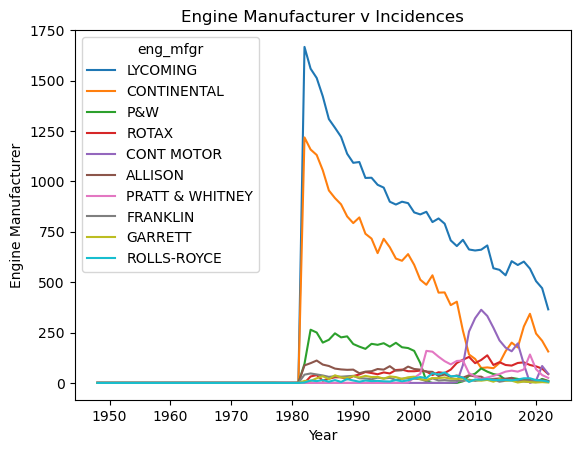

In [6]:
fig1 = plt.figure(1)
df_mfg_top.plot(kind='line',title='Engine Manufacturer v Incidences',xlabel='Year',ylabel='Engine Manufacturer')